# **Projek Akhir Data Wrangling**

**Data Cleanning**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data_gabungan_bulanan_2015-2017.csv")
df

,year,month,location,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,...,DEWP,WSPM,RAIN,wd,wd_deg,Humidity,Visibility,AQI,Latitude,Longitude
0,2015,1,Guanyuan,95.22,105.89,38.61,77.17,1898.64,18.77,-0.70,...,-14.30,1.69,0.20,ENE,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2,Guanyuan,93.35,114.75,29.69,61.92,1485.16,31.68,1.23,...,-13.04,1.81,7.00,NE,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,3,Guanyuan,85.38,137.03,22.71,59.44,1195.94,45.44,8.44,...,-9.88,2.21,6.60,E,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,4,Guanyuan,73.01,119.69,9.70,47.19,812.02,76.49,15.63,...,1.69,2.48,40.10,SW,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,5,Guanyuan,55.48,107.15,8.90,40.19,759.70,94.39,21.46,...,6.61,2.47,37.30,SW,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2017,12,Beijing,81.66,156.88,25.44,61.35,2.89,95.77,21.15,...,NaN,5.52,162.80,NaN,201.64,62.21,11.87,299.71,33.56,114.94
201,2017,12,Chengdu,176.01,173.34,34.56,53.76,2.45,66.27,20.55,...,NaN,4.63,129.16,NaN,237.31,77.90,15.01,277.00,37.76,109.48
202,2017,12,Guangzhou,105.06,195.80,33.68,59.93,1.93,72.40,-5.03,...,NaN,6.16,57.52,NaN,145.50,47.47,2.27,192.50,45.14,126.69
203,2017,12,Shanghai,76.86,147.56,23.13,51.46,2.89,80.04,14.61,...,NaN,3.98,120.44,NaN,98.13,54.90,9.45,153.50,37.57,106.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        205 non-null    int64  
 1   month       205 non-null    int64  
 2   location    205 non-null    object 
 3   PM2.5       205 non-null    float64
 4   PM10        205 non-null    float64
 5   SO2         205 non-null    float64
 6   NO2         205 non-null    float64
 7   CO          205 non-null    float64
 8   O3          205 non-null    float64
 9   TEMP        205 non-null    float64
 10  PRES        205 non-null    float64
 11  DEWP        26 non-null     float64
 12  WSPM        205 non-null    float64
 13  RAIN        205 non-null    float64
 14  wd          26 non-null     object 
 15  wd_deg      179 non-null    float64
 16  Humidity    179 non-null    float64
 17  Visibility  179 non-null    float64
 18  AQI         179 non-null    float64
 19  Latitude    179 non-null    f

In [6]:
df.isnull().sum()

year            0
month           0
location        0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP          179
WSPM            0
RAIN            0
wd            179
wd_deg         26
Humidity       26
Visibility     26
AQI            26
Latitude       26
Longitude      26
dtype: int64

In [7]:
(df.isnull().mean() * 100)

year           0.000000
month          0.000000
location       0.000000
PM2.5          0.000000
PM10           0.000000
SO2            0.000000
NO2            0.000000
CO             0.000000
O3             0.000000
TEMP           0.000000
PRES           0.000000
DEWP          87.317073
WSPM           0.000000
RAIN           0.000000
wd            87.317073
wd_deg        12.682927
Humidity      12.682927
Visibility    12.682927
AQI           12.682927
Latitude      12.682927
Longitude     12.682927
dtype: float64

In [22]:
missing_percent = df.isnull().mean() * 100

df = df.loc[:, missing_percent < 50]

print("Kolom tersisa setelah menghapus yang missing > 50%:")
print(df.columns)

Kolom tersisa setelah menghapus yang missing > 50%:
Index(['year', 'month', 'location', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'TEMP', 'PRES', 'WSPM', 'RAIN', 'wd_deg', 'Humidity', 'Visibility',
       'AQI', 'Latitude', 'Longitude', 'date', 'TEMP_CAT'],
      dtype='object')


In [ ]:
# # Isi numerik dengan median
# for col in df.select_dtypes(include=['float64', 'int64']).columns:
#     df[col].fillna(df[col].median(), inplace=True)

# # Isi kategorikal dengan modus
# for col in df.select_dtypes(include='object').columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# # Cek apakah masih ada missing
# df.isnull().sum()

In [ ]:
import numpy as np

# Gabungin waktu
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")

df = df.drop_duplicates()

for col in df.columns:
    if col != "date": 
        df[col] = pd.to_numeric(df[col], errors='ignore')

# Isi nilai kosong di kolom numerik dengan median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Isi nilai kosong di kolom kategorikal dengan modus
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Jumlah missing value setelah final cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Ubah kolom date jadi string
df["date"] = df["date"].dt.strftime("%Y-%m-%d")

df.to_csv("clean_data.csv", index=False)
df

Jumlah missing value setelah final cleaning:
Series([], dtype: int64)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\1963587816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\1963587816.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\1963587816.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

,year,month,location,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN,wd_deg,Humidity,Visibility,AQI,Latitude,Longitude,date
0,2015,1,Guanyuan,95.22,105.89,38.61,77.17,1898.64,18.77,-0.70,1021.97,1.69,0.20,179.94,55.01,10.10,243.00,35.38,110.35,2015-01-01
1,2015,2,Guanyuan,93.35,114.75,29.69,61.92,1485.16,31.68,1.23,1018.51,1.81,7.00,179.94,55.01,10.10,243.00,35.38,110.35,2015-02-01
2,2015,3,Guanyuan,85.38,137.03,22.71,59.44,1195.94,45.44,8.44,1016.87,2.21,6.60,179.94,55.01,10.10,243.00,35.38,110.35,2015-03-01
3,2015,4,Guanyuan,73.01,119.69,9.70,47.19,812.02,76.49,15.63,1010.87,2.48,40.10,179.94,55.01,10.10,243.00,35.38,110.35,2015-04-01
4,2015,5,Guanyuan,55.48,107.15,8.90,40.19,759.70,94.39,21.46,1003.45,2.47,37.30,179.94,55.01,10.10,243.00,35.38,110.35,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2017,12,Beijing,81.66,156.88,25.44,61.35,2.89,95.77,21.15,1012.19,5.52,162.80,201.64,62.21,11.87,299.71,33.56,114.94,2017-12-01
201,2017,12,Chengdu,176.01,173.34,34.56,53.76,2.45,66.27,20.55,1003.22,4.63,129.16,237.31,77.90,15.01,277.00,37.76,109.48,2017-12-01
202,2017,12,Guangzhou,105.06,195.80,33.68,59.93,1.93,72.40,-5.03,1019.59,6.16,57.52,145.50,47.47,2.27,192.50,45.14,126.69,2017-12-01
203,2017,12,Shanghai,76.86,147.56,23.13,51.46,2.89,80.04,14.61,1023.53,3.98,120.44,98.13,54.90,9.45,153.50,37.57,106.99,2017-12-01


**EDA (Exploratory Data Analysis)**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# Load file hasil cleaning
df = pd.read_csv("clean_data.csv")

# Pastikan kolom waktu benar
if 'date' in df.columns:
    df["date"] = pd.to_datetime(df["date"])

# Cek 5 data awal
df.head()

,year,month,location,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN,wd_deg,Humidity,Visibility,AQI,Latitude,Longitude,date
0,2015,1,Guanyuan,95.22,105.89,38.61,77.17,1898.64,18.77,-0.70,1021.97,1.69,0.2,179.94,55.01,10.1,243.0,35.38,110.35,2015-01-01
1,2015,2,Guanyuan,93.35,114.75,29.69,61.92,1485.16,31.68,1.23,1018.51,1.81,7.0,179.94,55.01,10.1,243.0,35.38,110.35,2015-02-01
2,2015,3,Guanyuan,85.38,137.03,22.71,59.44,1195.94,45.44,8.44,1016.87,2.21,6.6,179.94,55.01,10.1,243.0,35.38,110.35,2015-03-01
3,2015,4,Guanyuan,73.01,119.69,9.70,47.19,812.02,76.49,15.63,1010.87,2.48,40.1,179.94,55.01,10.1,243.0,35.38,110.35,2015-04-01
4,2015,5,Guanyuan,55.48,107.15,8.90,40.19,759.70,94.39,21.46,1003.45,2.47,37.3,179.94,55.01,10.1,243.0,35.38,110.35,2015-05-01


In [12]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])
print("\nTipe data tiap kolom:")
print(df.dtypes)

print("\nStatistik deskriptif:")
display(df.describe())

Jumlah baris: 205
Jumlah kolom: 20

Tipe data tiap kolom:
year                   int64
month                  int64
location              object
PM2.5                float64
PM10                 float64
SO2                  float64
NO2                  float64
CO                   float64
O3                   float64
TEMP                 float64
PRES                 float64
WSPM                 float64
RAIN                 float64
wd_deg               float64
Humidity             float64
Visibility           float64
AQI                  float64
Latitude             float64
Longitude            float64
date          datetime64[ns]
dtype: object

Statistik deskriptif:


,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN,wd_deg,Humidity,Visibility,AQI,Latitude,Longitude,date
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
mean,2015.956098,6.473171,123.790780,153.113951,24.096585,53.190390,161.845610,97.352293,14.931073,1013.860829,4.784049,112.615561,181.135073,55.719805,10.207610,245.779268,35.197902,109.940439,2016-05-30 06:12:17.560975616
min,2015.000000,1.000000,30.590000,40.620000,3.430000,21.010000,0.730000,11.410000,-5.030000,987.760000,0.170000,0.000000,42.970000,15.590000,1.810000,12.000000,20.040000,93.990000,2015-01-01 00:00:00
25%,2015.000000,3.000000,99.220000,127.470000,19.620000,43.910000,2.180000,80.790000,9.890000,1006.740000,3.560000,62.730000,155.880000,49.090000,8.800000,209.880000,33.140000,106.340000,2015-09-01 00:00:00
50%,2016.000000,6.000000,122.640000,155.390000,23.890000,53.510000,2.730000,99.290000,15.150000,1013.980000,4.880000,98.620000,179.940000,55.010000,10.100000,243.000000,35.380000,110.350000,2016-06-01 00:00:00
75%,2017.000000,9.000000,148.120000,177.990000,29.690000,62.320000,3.270000,116.960000,20.920000,1021.070000,6.040000,162.410000,202.970000,61.480000,12.160000,287.250000,37.170000,113.170000,2017-02-01 00:00:00
max,2017.000000,12.000000,232.590000,296.140000,44.270000,89.600000,2818.720000,166.320000,36.480000,1048.710000,8.890000,321.320000,338.630000,95.570000,18.010000,468.000000,45.430000,129.060000,2017-12-01 00:00:00
std,0.806241,3.473360,37.525496,43.900174,8.643137,13.617347,462.708862,31.661872,7.984695,10.238605,1.917245,71.713031,47.167352,13.309328,3.059786,69.857715,4.079584,5.800506,NaN


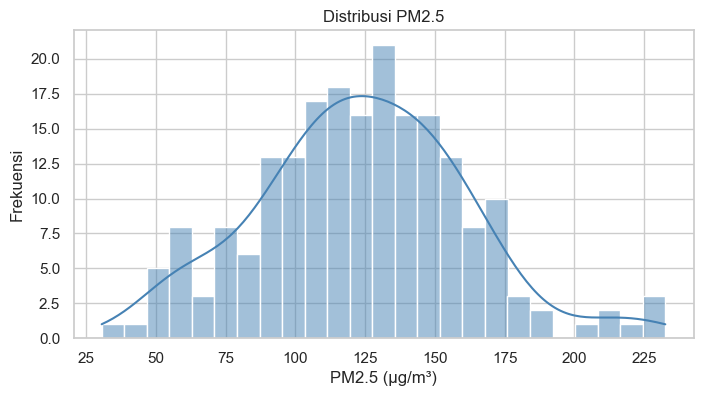

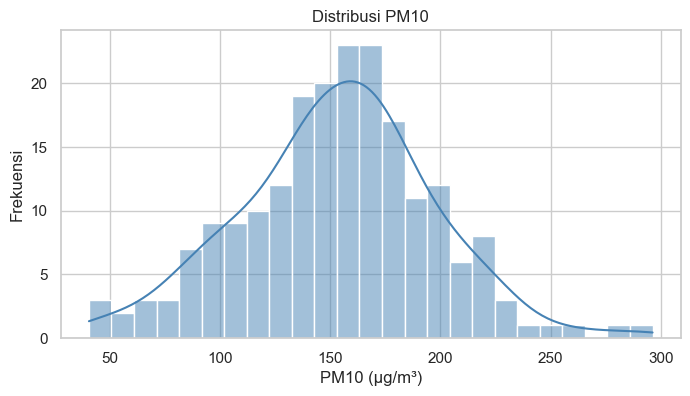

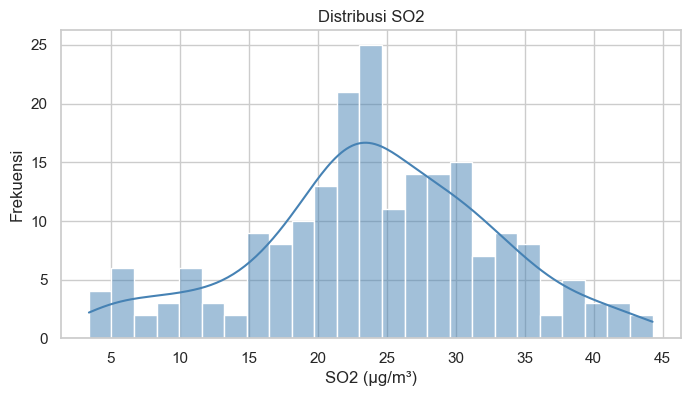

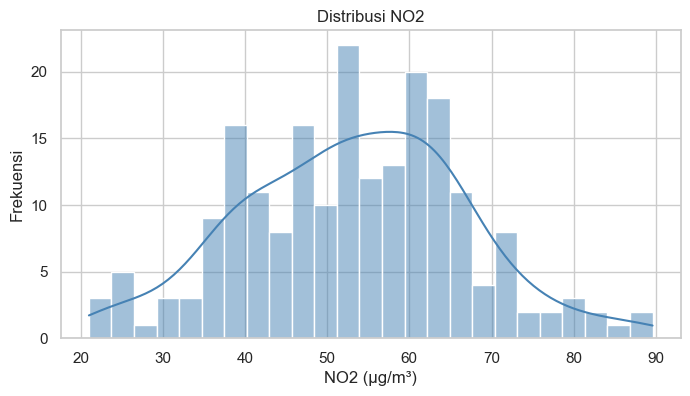

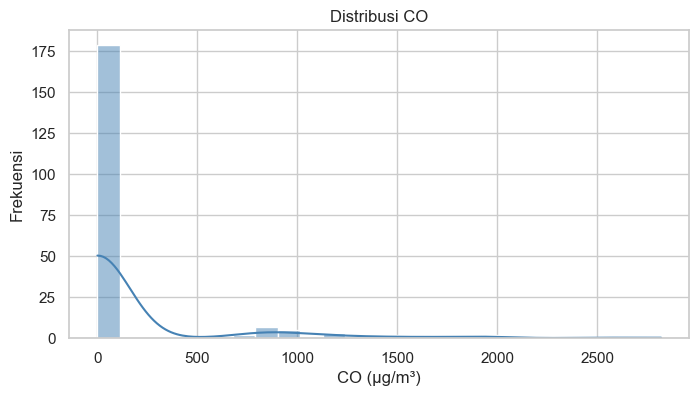

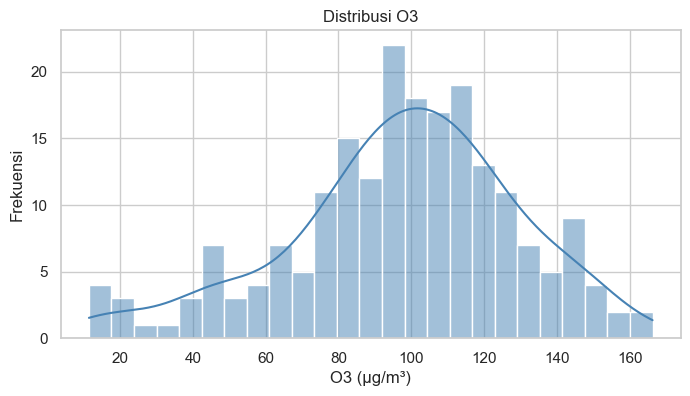

In [13]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for col in pollutants:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=25, color="steelblue")
    plt.title(f"Distribusi {col}")
    plt.xlabel(f"{col} (µg/m³)")
    plt.ylabel("Frekuensi")
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\1186212006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="PM2.5", palette="coolwarm")


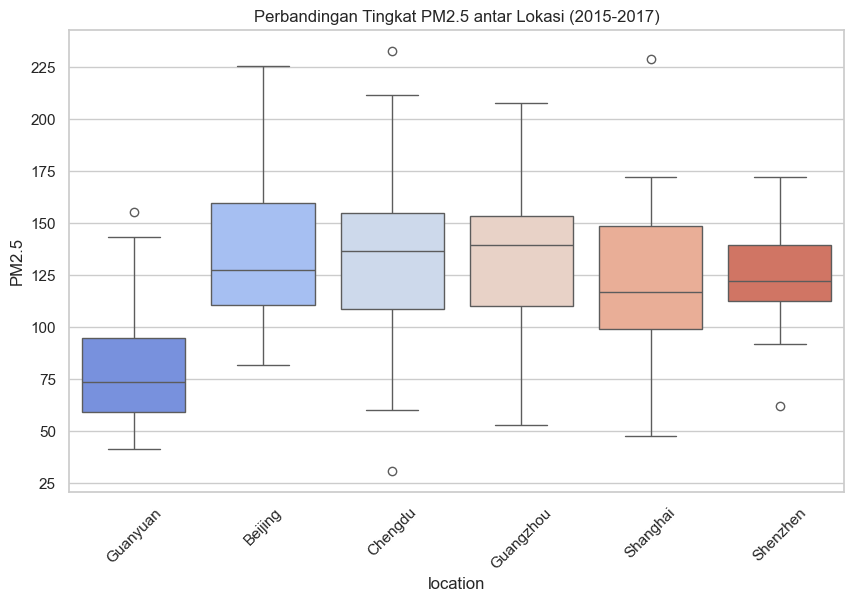

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="location", y="PM2.5", palette="coolwarm")
plt.title("Perbandingan Tingkat PM2.5 antar Lokasi (2015-2017)")
plt.xticks(rotation=45)
plt.show()

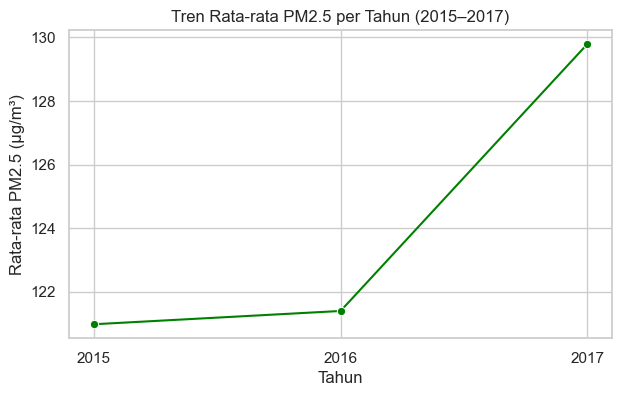

In [15]:
yearly_pm25 = df.groupby('year')['PM2.5'].mean().reset_index()
yearly_pm25["year"] = yearly_pm25["year"].astype(str)

plt.figure(figsize=(7,4))
sns.lineplot(data=yearly_pm25, x="year", y="PM2.5", marker="o", color="green")
plt.title("Tren Rata-rata PM2.5 per Tahun (2015–2017)")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xlabel("Tahun")
plt.grid(True)
plt.show()

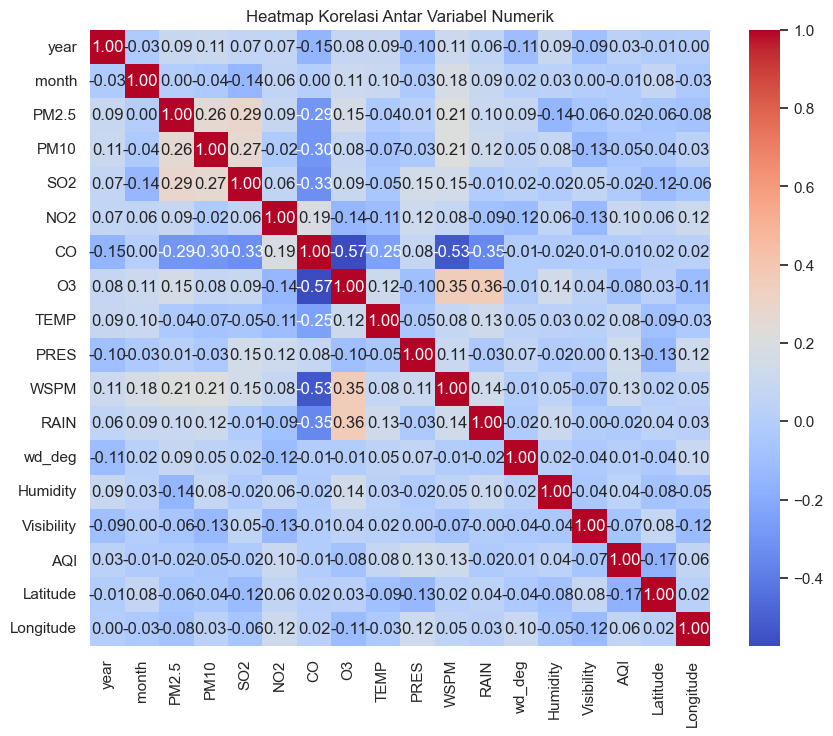

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20664\2187265221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TEMP_CAT", y="PM2.5", palette="coolwarm")


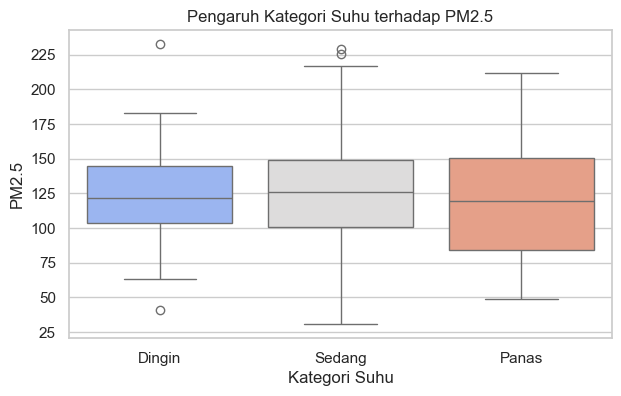

In [17]:
df["TEMP_CAT"] = pd.cut(df["TEMP"], bins=3, labels=["Dingin", "Sedang", "Panas"])

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="TEMP_CAT", y="PM2.5", palette="coolwarm")
plt.title("Pengaruh Kategori Suhu terhadap PM2.5")
plt.xlabel("Kategori Suhu")
plt.ylabel("PM2.5")
plt.show()

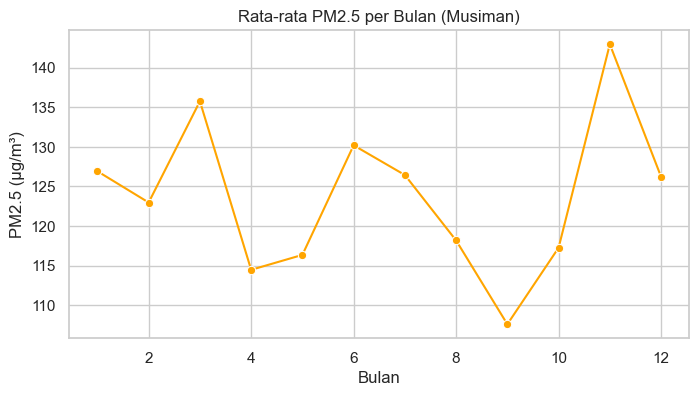

In [18]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df.groupby("month")["PM2.5"].mean(), marker="o", color="orange")
plt.title("Rata-rata PM2.5 per Bulan (Musiman)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Bulan")
plt.show()

In [19]:
df.to_csv("Data_Fix.csv", index=False)

In [20]:
df = pd.read_csv("Data_Fix.csv")
df

,year,month,location,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,...,WSPM,RAIN,wd_deg,Humidity,Visibility,AQI,Latitude,Longitude,date,TEMP_CAT
0,2015,1,Guanyuan,95.22,105.89,38.61,77.17,1898.64,18.77,-0.70,...,1.69,0.20,179.94,55.01,10.10,243.00,35.38,110.35,2015-01-01,Dingin
1,2015,2,Guanyuan,93.35,114.75,29.69,61.92,1485.16,31.68,1.23,...,1.81,7.00,179.94,55.01,10.10,243.00,35.38,110.35,2015-02-01,Dingin
2,2015,3,Guanyuan,85.38,137.03,22.71,59.44,1195.94,45.44,8.44,...,2.21,6.60,179.94,55.01,10.10,243.00,35.38,110.35,2015-03-01,Dingin
3,2015,4,Guanyuan,73.01,119.69,9.70,47.19,812.02,76.49,15.63,...,2.48,40.10,179.94,55.01,10.10,243.00,35.38,110.35,2015-04-01,Sedang
4,2015,5,Guanyuan,55.48,107.15,8.90,40.19,759.70,94.39,21.46,...,2.47,37.30,179.94,55.01,10.10,243.00,35.38,110.35,2015-05-01,Sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2017,12,Beijing,81.66,156.88,25.44,61.35,2.89,95.77,21.15,...,5.52,162.80,201.64,62.21,11.87,299.71,33.56,114.94,2017-12-01,Sedang
201,2017,12,Chengdu,176.01,173.34,34.56,53.76,2.45,66.27,20.55,...,4.63,129.16,237.31,77.90,15.01,277.00,37.76,109.48,2017-12-01,Sedang
202,2017,12,Guangzhou,105.06,195.80,33.68,59.93,1.93,72.40,-5.03,...,6.16,57.52,145.50,47.47,2.27,192.50,45.14,126.69,2017-12-01,Dingin
203,2017,12,Shanghai,76.86,147.56,23.13,51.46,2.89,80.04,14.61,...,3.98,120.44,98.13,54.90,9.45,153.50,37.57,106.99,2017-12-01,Sedang
